In [1]:
%matplotlib inline

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
from datetime import timedelta as td
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
from geopy.geocoders import Nominatim
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

import matplotlib.gridspec as gridspec
import matplotlib as mpl
from __future__ import print_function
warnings.filterwarnings("ignore")

# Import Dataset

In [3]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
# Learn more about our data
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [5]:
# Learn more about our data
df.shape

(34857, 21)

In [6]:
# Learn more about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
# Change Landsize to int
# df["Landsize"] = df["Landsize"].fillna(0)
# df = df.astype({"Landsize": int})
# df.dtypes

In [8]:
# Drop unnecessary columns
df.drop(["SellerG",
         "Method",
         "BuildingArea",
         "YearBuilt",
         "Lattitude",
         "Longtitude"], axis=1, inplace=True)
df.shape

(34857, 15)

In [9]:
df["CouncilArea"] = df["CouncilArea"].str.replace('Council','')
df

,Suburb,Address,Rooms,Type,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,Yarra City,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra City,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,Yarra City,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra City,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,Maribyrnong City,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,Maribyrnong City,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,Maribyrnong City,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,Maribyrnong City,Western Metropolitan,6543.0


In [10]:
# Rename columns
melbourne_df = df.rename(columns={"Bedroom2": "Bedroom",
                                  "Landsize": "Land Size",
                                  "CouncilArea": "Council",
                                  "Regionname": "Region",
                                  "Propertycount": "Property Count"})
melbourne_df

,Suburb,Address,Rooms,Type,Price,Date,Distance,Postcode,Bedroom,Bathroom,Car,Land Size,Council,Region,Property Count
0,Abbotsford,68 Studley St,2,h,NaN,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,Yarra City,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra City,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,Yarra City,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra City,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,Maribyrnong City,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,Maribyrnong City,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,Maribyrnong City,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,Maribyrnong City,Western Metropolitan,6543.0


In [11]:
# ISO timestamp the Date column
melbourne_df["Date"] = pd.to_datetime(df["Date"])

# Change to month/year format
# melbourne_df["Date"] = melbourne_df["Date"].apply(lambda x: x.strftime('%Y/%B'))
melbourne_df["Date"] = melbourne_df["Date"].apply(lambda x: x.strftime('%Y/%m'))
melbourne_df

,Suburb,Address,Rooms,Type,Price,Date,Distance,Postcode,Bedroom,Bathroom,Car,Land Size,Council,Region,Property Count
0,Abbotsford,68 Studley St,2,h,NaN,2016/03,2.5,3067.0,2.0,1.0,1.0,126.0,Yarra City,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,2016/03,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,2016/04,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra City,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,2016/04,2.5,3067.0,3.0,2.0,1.0,0.0,Yarra City,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,2017/04,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra City,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,2018/02,6.3,3013.0,4.0,1.0,3.0,593.0,Maribyrnong City,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,2018/02,6.3,3013.0,2.0,2.0,1.0,98.0,Maribyrnong City,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,2018/02,6.3,3013.0,2.0,1.0,2.0,220.0,Maribyrnong City,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,2018/02,6.3,3013.0,NaN,NaN,NaN,NaN,Maribyrnong City,Western Metropolitan,6543.0


In [12]:
# Identify missing data
melbourne_df.isna().sum()

Suburb                0
Address               0
Rooms                 0
Type                  0
Price              7610
Date                  0
Distance              1
Postcode              1
Bedroom            8217
Bathroom           8226
Car                8728
Land Size         11810
Council               3
Region                3
Property Count        3
dtype: int64

In [13]:
# Drop necessary null values
melbourne_df.dropna(subset=["Price",
                            "Distance", # 1 value
                            "Postcode", # 1 value
                            "Council", # 3 values
                            "Region", #3 values
                            "Property Count"], # 3 values
                    inplace=True)
melbourne_df.shape

(27244, 15)

In [14]:
# Identify missing data
melbourne_df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Date                 0
Distance             0
Postcode             0
Bedroom           6438
Bathroom          6444
Car               6821
Land Size         9262
Council              0
Region               0
Property Count       0
dtype: int64

# Normality check

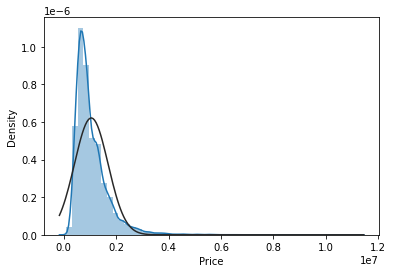

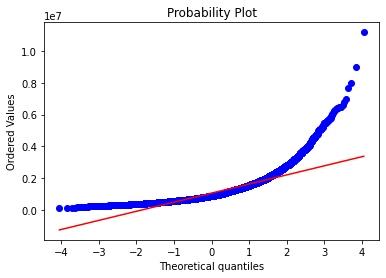

In [15]:
# Check the histogram and probability plot to see whether the target feature is normally distributed
sns.distplot(melbourne_df["Price"], fit=norm)
fig = plt.figure()
prob = stats.probplot(melbourne_df["Price"], plot=plt)

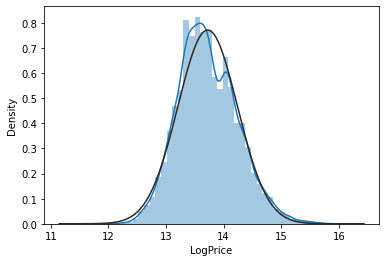

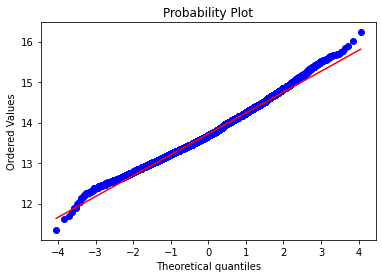

In [16]:
# Since the probability plot looks like log distribution, we can transform it with np.log()
melbourne_df["LogPrice"] = np.log(melbourne_df["Price"])
dist_price = sns.distplot(melbourne_df["LogPrice"], fit=norm)
fig = plt.figure()
prob_log = stats.probplot(melbourne_df["LogPrice"], plot=plt)
plt.show()

# Outliers

In [17]:
# Value < Q1 - 1,5*IQR OR Value > Q3 + 1,5 * IQR
def finding_outliers(data, variable_name) :
    iqr = data[variable_name].quantile(0.75) - data[variable_name].quantile(0.25)
    lower =  data[variable_name].quantile(0.25) -1.5*iqr
    upper =  data[variable_name].quantile(0.75) + 1.5*iqr
    return data [(data[variable_name] < lower) | (data[variable_name] > upper)]

<AxesSubplot:ylabel='Price'>

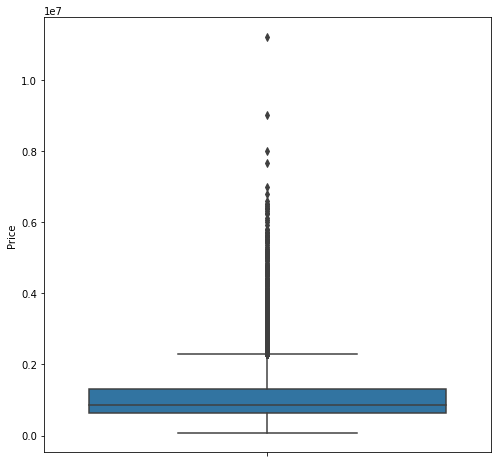

In [18]:
# Price boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="Price", data=melbourne_df)

<AxesSubplot:ylabel='Price'>

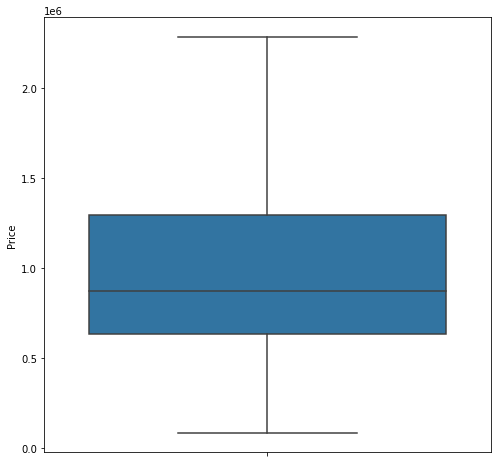

In [19]:
# Price outliers
finding_outliers(melbourne_df, "Price").sort_values("Price")

# For price
iqr_price = melbourne_df["Price"].quantile(0.75) - melbourne_df["Price"].quantile(0.25)
melbourne_df["Price"].quantile(0.75) + 1.5 * iqr_price
melbourne_df.loc[(finding_outliers(melbourne_df, "Price").index, "Price")] = melbourne_df["Price"].quantile(0.75) + 1.5 * iqr_price

# Price boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="Price", data=melbourne_df)

<AxesSubplot:ylabel='Bedroom'>

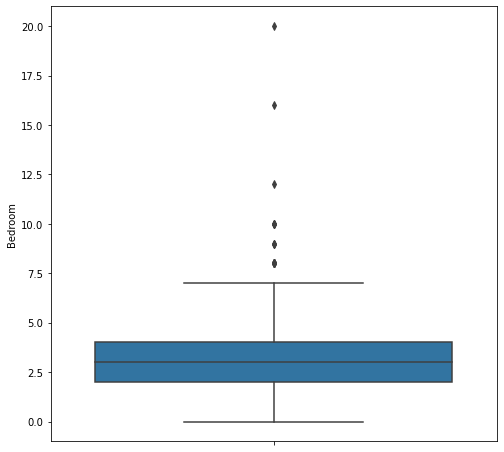

In [20]:
# Bedroom boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="Bedroom", data=melbourne_df)

<AxesSubplot:ylabel='Bedroom'>

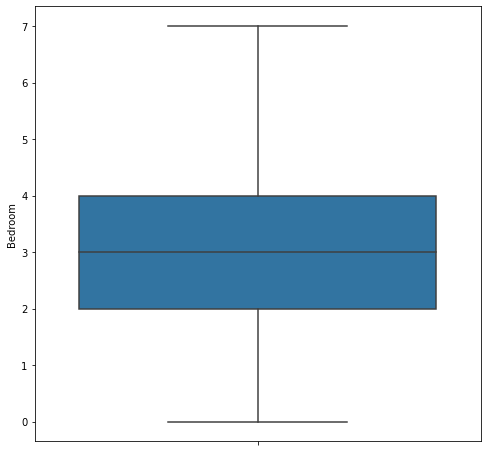

In [21]:
# Bedroom outliers
finding_outliers(melbourne_df, "Bedroom").sort_values("Bedroom")

# For price
iqr_price = melbourne_df["Bedroom"].quantile(0.75) - melbourne_df["Bedroom"].quantile(0.25)
melbourne_df["Bedroom"].quantile(0.75) + 1.5 * iqr_price
melbourne_df.loc[(finding_outliers(melbourne_df, "Bedroom").index, "Bedroom")] = melbourne_df["Bedroom"].quantile(0.75) + 1.5 * iqr_price

# Bedroom boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="Bedroom", data=melbourne_df)

<AxesSubplot:ylabel='Bathroom'>

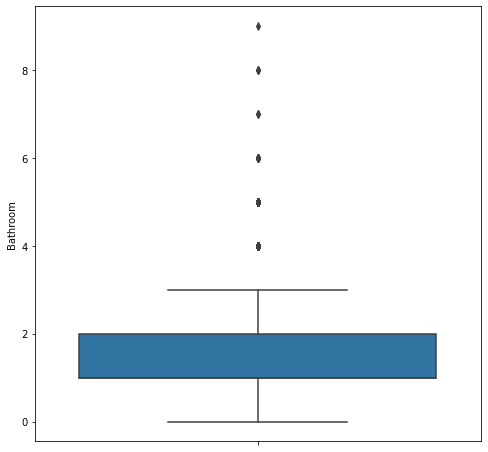

In [22]:
# Bathroom boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="Bathroom", data=melbourne_df)

<AxesSubplot:ylabel='Bathroom'>

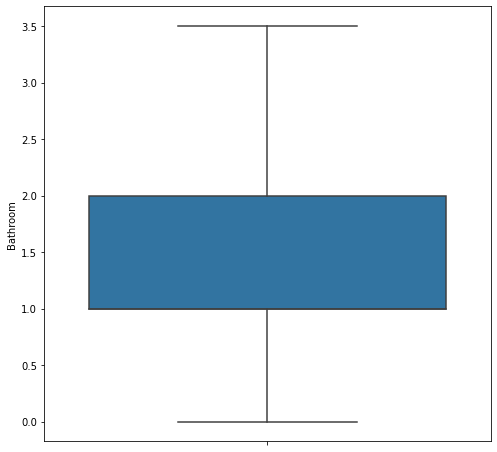

In [23]:
# Bathroom outliers
finding_outliers(melbourne_df, "Bathroom").sort_values("Bathroom")

# for price
iqr_price = melbourne_df["Bathroom"].quantile(0.75) - melbourne_df["Bathroom"].quantile(0.25)
melbourne_df["Bathroom"].quantile(0.75) + 1.5 * iqr_price
melbourne_df.loc[(finding_outliers(melbourne_df, "Bathroom").index, "Bathroom")] = melbourne_df["Bathroom"].quantile(0.75) + 1.5 * iqr_price

# Bathroom boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="Bathroom", data=melbourne_df)

<AxesSubplot:ylabel='Land Size'>

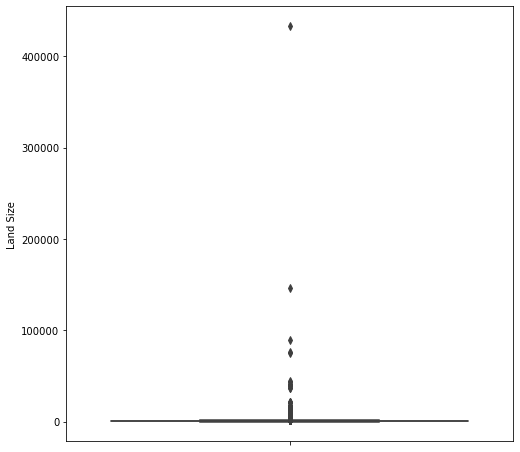

In [24]:
# Land Size boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="Land Size", data=melbourne_df)

<AxesSubplot:ylabel='Land Size'>

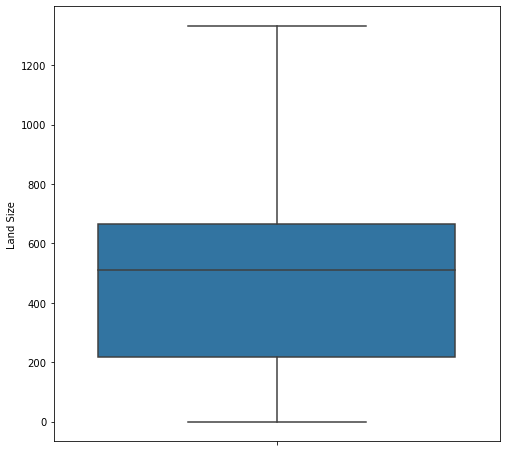

In [25]:
# Land Size outliers
finding_outliers(melbourne_df, "Land Size").sort_values("Land Size")

# for price
iqr_price = melbourne_df["Land Size"].quantile(0.75) - melbourne_df["Land Size"].quantile(0.25)
melbourne_df["Land Size"].quantile(0.75) + 1.5 * iqr_price
melbourne_df.loc[(finding_outliers(melbourne_df, "Land Size").index, "Land Size")] = melbourne_df["Land Size"].quantile(0.75) + 1.5 * iqr_price

# Landsize boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="Land Size", data=melbourne_df)

# Relationships

### Boxplots

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

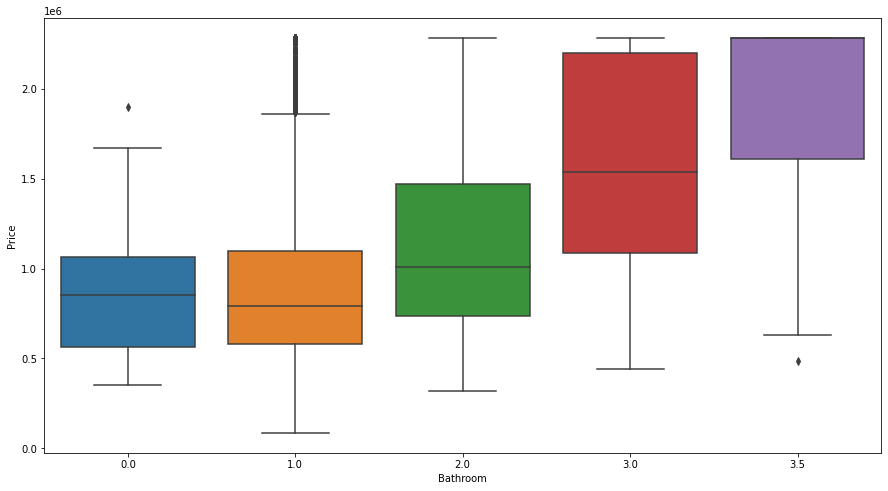

In [26]:
# Plot Bathroom vs Price
plt.figure(figsize=(15,8))
sns.boxplot(x="Bathroom", y="Price", data=melbourne_df)

<AxesSubplot:xlabel='Bedroom', ylabel='Price'>

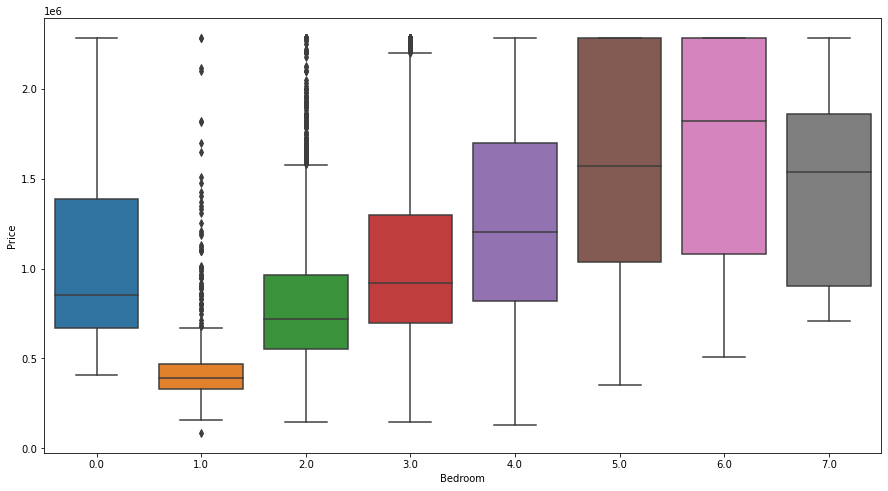

In [27]:
# Plot Bedroom vs Price
plt.figure(figsize=(15,8))
sns.boxplot(x="Bedroom", y="Price", data=melbourne_df)

<AxesSubplot:xlabel='Date', ylabel='Price'>

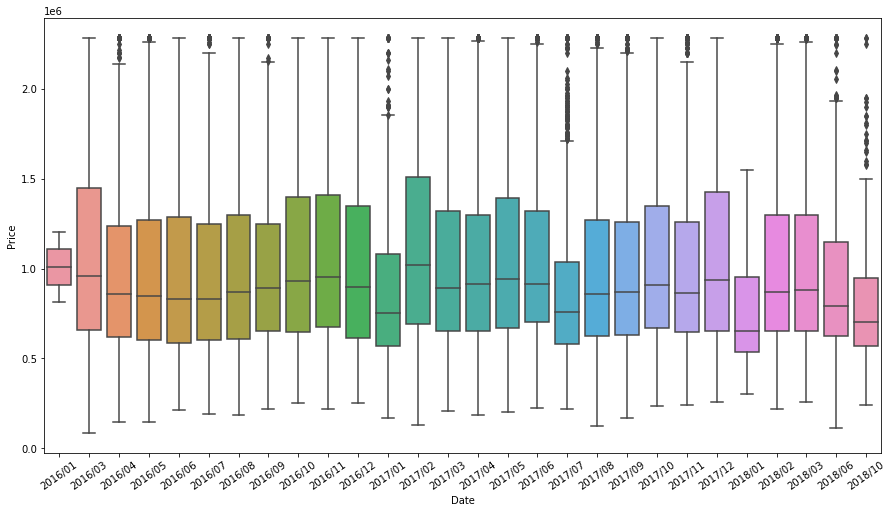

In [28]:
# Plot Price and Date
plt.figure(figsize=(15,8))
plt.xticks(rotation = 35)
sns.boxplot(x="Date", y="Price", data=melbourne_df.sort_values("Date"))

In [29]:
################## Plot Landsize vs Price
################## Use bins for Landsize to clean up boxplot
# plt.figure(figsize=(15,8))
# sns.boxplot(x="Land Size", y="Price", data=melbourne_df)

<AxesSubplot:xlabel='Bedroom', ylabel='Price'>

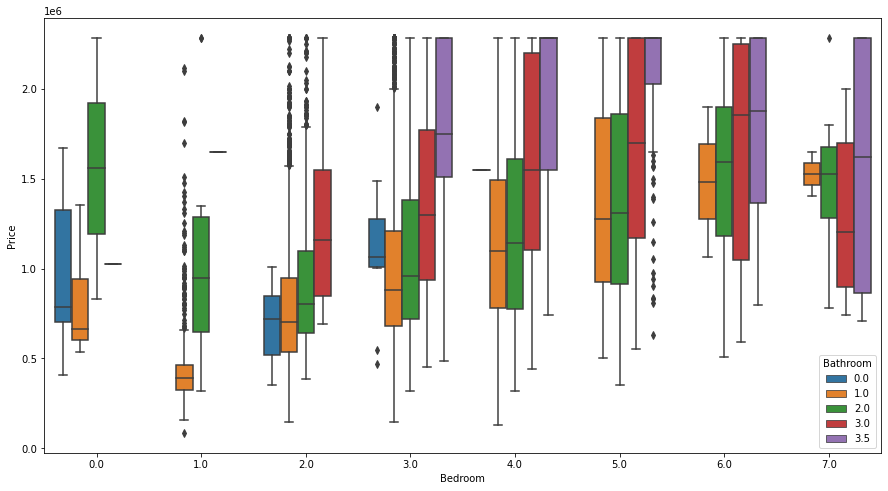

In [30]:
# Plot Price, Bedroom and Bathroom
plt.figure(figsize=(15,8))
sns.boxplot(x="Bedroom", y="Price", hue="Bathroom", data=melbourne_df)

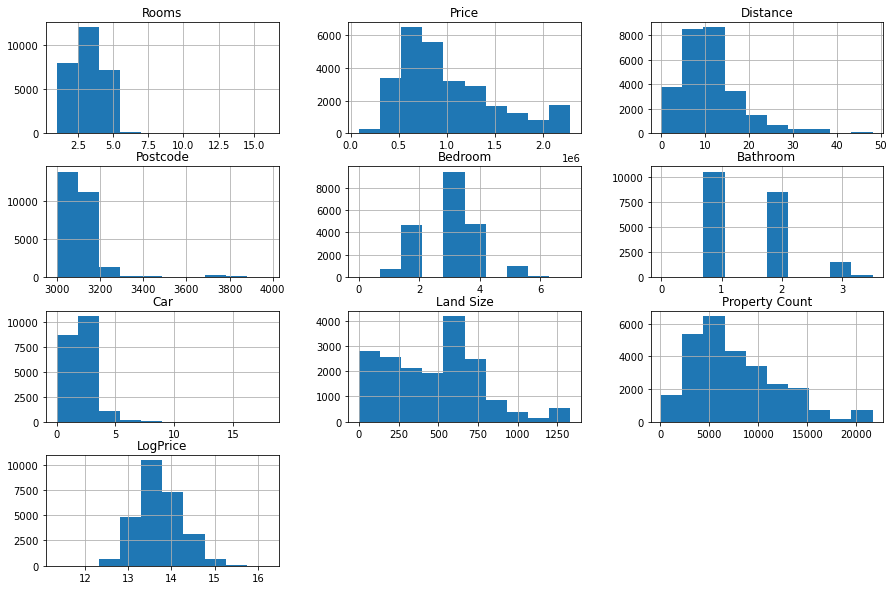

In [31]:
# Plot each numerical attribute
melbourne_df.hist(figsize=(15, 10))
plt.show()

### Countplots

<AxesSubplot:xlabel='Bathroom', ylabel='count'>

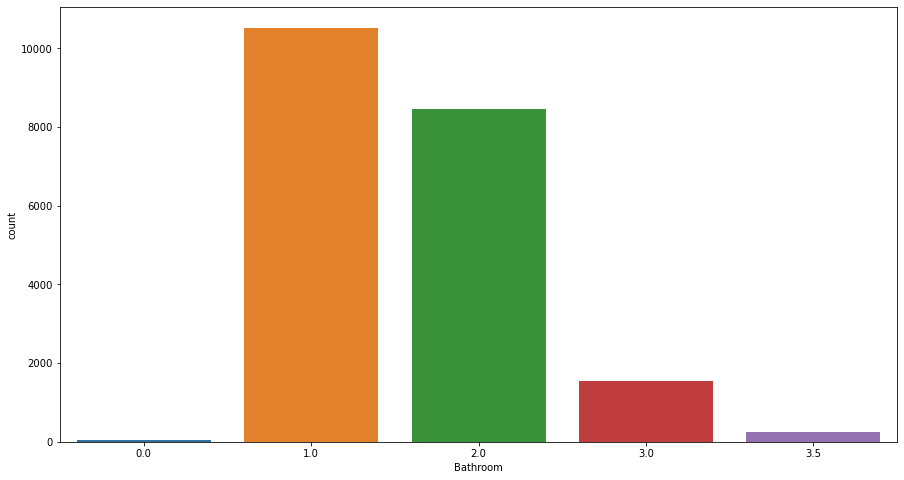

In [32]:
# Plot Bathroom
plt.figure(figsize=(15,8))
sns.countplot(x="Bathroom", data=melbourne_df)

<AxesSubplot:xlabel='Bedroom', ylabel='count'>

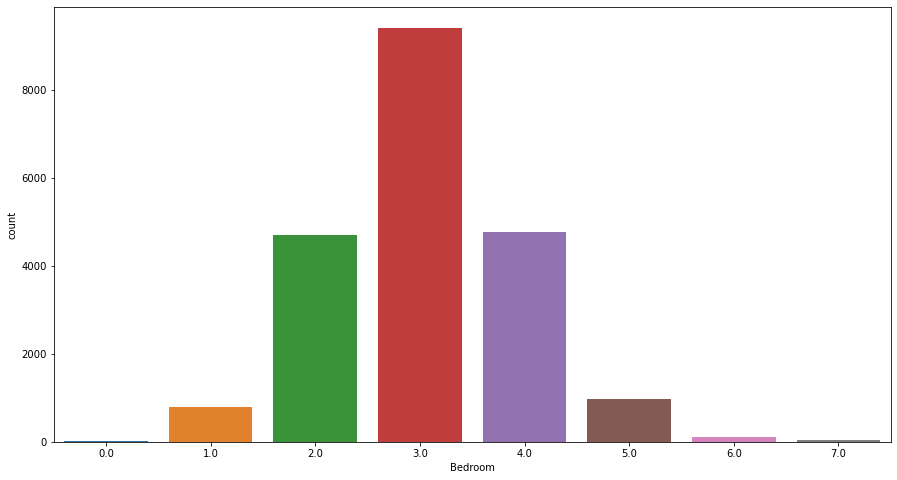

In [33]:
# Plot Bedroom
plt.figure(figsize = (15,8))
sns.countplot(x="Bedroom", data=melbourne_df)

<AxesSubplot:xlabel='Type', ylabel='count'>

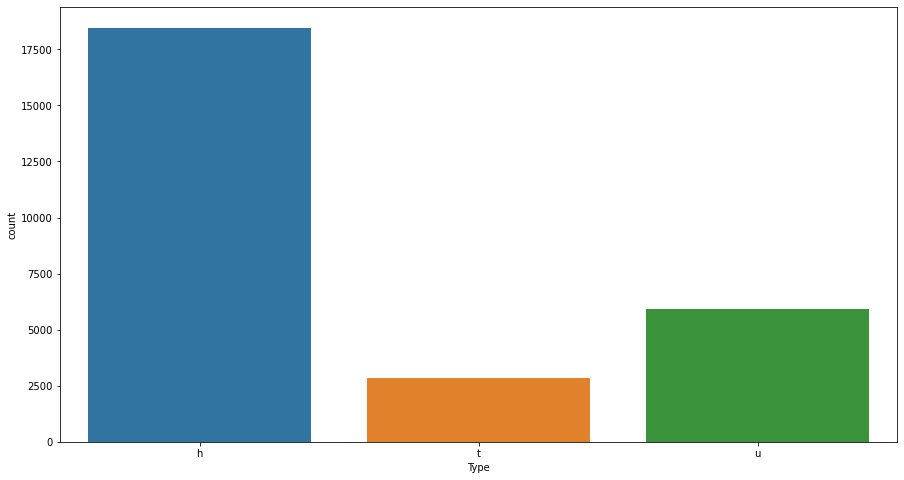

In [34]:
# Plot Type
plt.figure(figsize = (15,8))
sns.countplot(x="Type", data=melbourne_df)

<AxesSubplot:xlabel='Car', ylabel='count'>

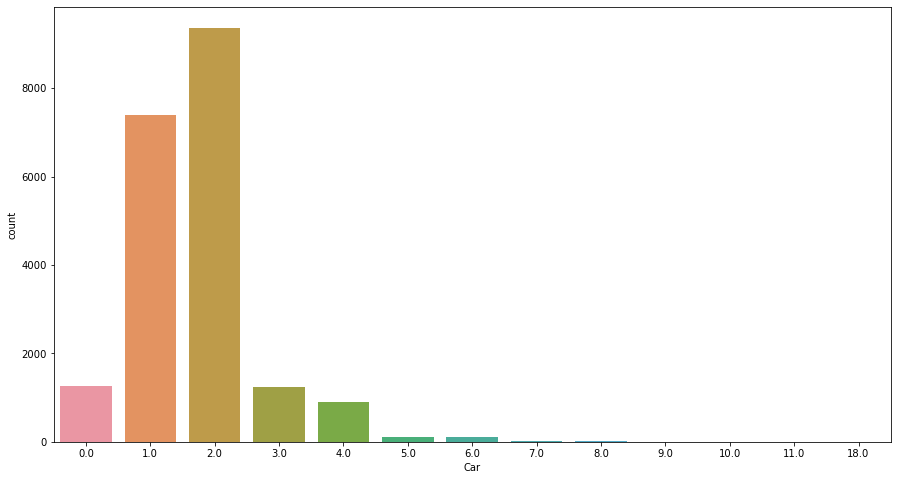

In [35]:
# Plot Car 
plt.figure(figsize = (15,8))
sns.countplot(x="Car", data=melbourne_df)

[Text(0, 0, 'Northern Metropolitan'),
 Text(1, 0, 'Western Metropolitan'),
 Text(2, 0, 'Southern Metropolitan'),
 Text(3, 0, 'Eastern Metropolitan'),
 Text(4, 0, 'South-Eastern Metropolitan'),
 Text(5, 0, 'Eastern Victoria'),
 Text(6, 0, 'Northern Victoria'),
 Text(7, 0, 'Western Victoria')]

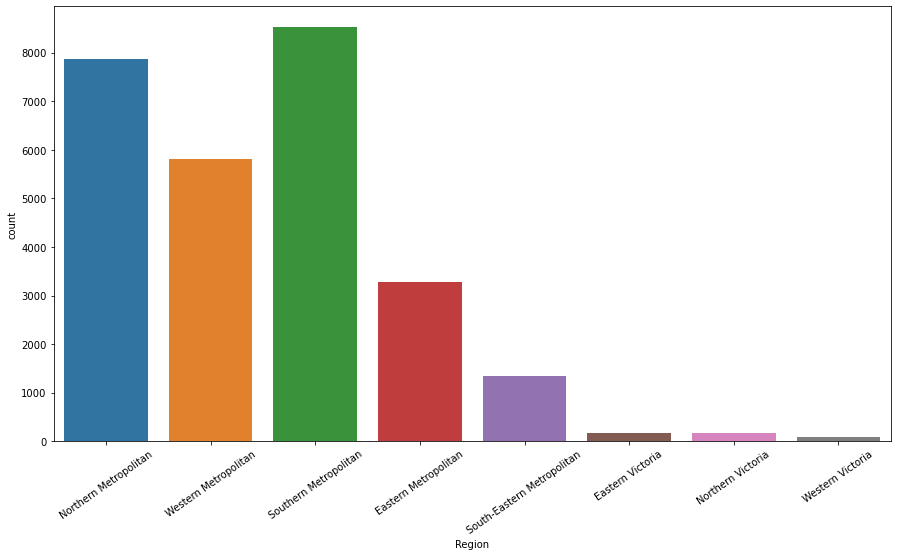

In [36]:
# Plot Region 
plt.figure(figsize = (15,8))
ax = sns.countplot(x="Region", data=melbourne_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 35)

<AxesSubplot:xlabel='Property Count', ylabel='Region'>

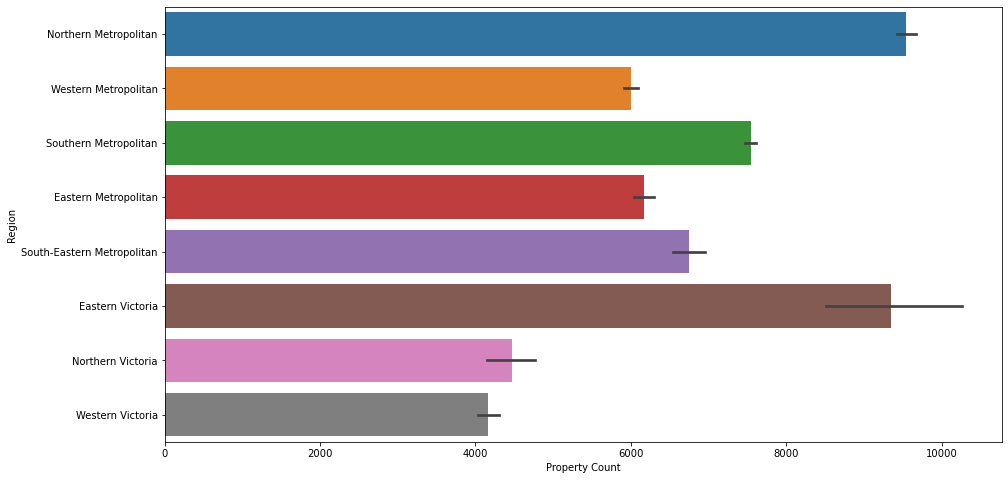

In [37]:
# Plot Property Count
plt.figure(figsize = (15,8))
sns.barplot(x="Property Count", y="Region", data=melbourne_df)

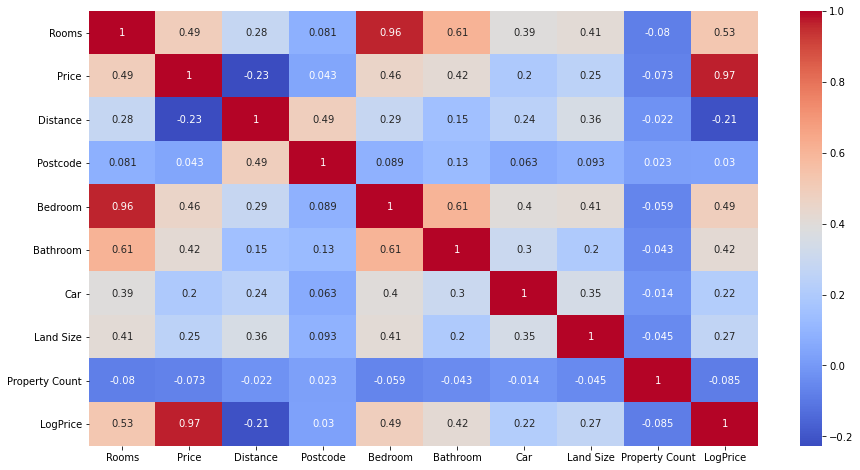

In [38]:
# heatmap
plt.figure(figsize=(15,8))
sns.heatmap(melbourne_df.corr(), annot=True, cmap='coolwarm')
plt.savefig('heatmap.png')

## Data preparation

In [39]:
# identify the variable to convert to numerical variable
obj_df = melbourne_df.select_dtypes(include=['object']).copy()
obj_df.head()

,Suburb,Address,Type,Date,Council,Region
1,Abbotsford,85 Turner St,h,2016/03,Yarra City,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,2016/04,Yarra City,Northern Metropolitan
4,Abbotsford,5 Charles St,h,2017/04,Yarra City,Northern Metropolitan
5,Abbotsford,40 Federation La,h,2017/04,Yarra City,Northern Metropolitan
6,Abbotsford,55a Park St,h,2016/04,Yarra City,Northern Metropolitan


In [40]:
# Convert categorical data to numeric and separate target feature for training data

# defining our features and label
X = melbourne_df.drop(["Price"], axis=1)
y = melbourne_df["Price"]

X = pd.get_dummies(X, columns=["Suburb",
                               "Address", 
                               "Type",
                               "Date",
                               "Council",
                               "Region"], drop_first=True)

In [41]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# validation data
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

# Scala data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Seth Help

In [42]:
len(melbourne_df)

27244

In [43]:
X_test_scaled[0]

array([ 0.0092461 ,  0.20814668, -0.26089964, ..., -0.67650907,
       -0.517223  , -0.05594414])

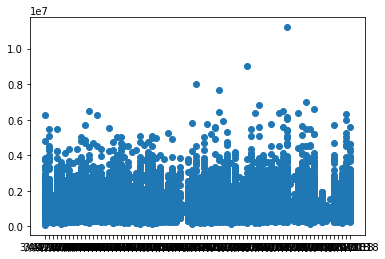

In [44]:
plt.scatter(df["Date"], df["Price"])

In [45]:
x = np.array(df["Date"][:100]).reshape(-1,1)
modelR = LinearRegression().fit(x, df["Price"][:100])

ValueError: could not convert string to float: '3/09/2016'

In [46]:
m = modelR.coef_[0]
m

NameError: name 'modelR' is not defined

In [ ]:
b = modelR.intercept_
b

In [ ]:
# Plot line of best fit
plt.scatter(np.arange(0, 100), df["Price"][:100])
plt.xlabel(list(df["Date"][:100]))
line_x = np.linspace(0, 100, 10)
line_y = m * line_x + b
# plt.plot(line_x, line_y)

## Data modeling

#### Linear Regression model

In [ ]:
# Fit the Linear Regression model with data
modelR = LinearRegression().fit(X_train_scaled, y_train)

In [ ]:
# Calculate training and testing score 
training_score = modelR.score(X_train_scaled, y_train)
testing_score = modelR.score(X_test_scaled, y_test)

In [ ]:
# Print the training and testing score
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

#### Random Forest model

In [ ]:
# Fit the Random Forest model with data
model_rf = RandomForestRegressor(n_estimators = 100, criterion = 'mse',
                              random_state = 42,
                             max_depth = 2).fit(X_train_scaled, y_train)

In [ ]:
# Calculate the training and testing score
training_score = model_rf.score(X_train, y_train)
testing_score = model_rf.score(X_test, y_test)

In [ ]:
# Print the training and testing score
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

#### Decision Tree model

In [ ]:
# Fit the Decision Tree model with data
model_tree = DecisionTreeRegressor(criterion = 'mse', 
                                  max_depth ='None', 
                                  min_samples_split= 2,
                                  min_sample_leaf=1, 
                                  max_feature = 1).fit(X_train_, y_train)

In [ ]:
# Calculate training and testing score 
training_score = model_tree.score(X_train, y_train)
testing_score = model_tree.score(X_train, y_test)

In [ ]:
# Print the training testing score
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

#### Randomized Search CV model

In [ ]:
# Fit the Randomized Search model with data
model_cv = randomizedSearchCV().fit(X_train_scaled, y_train)

In [ ]:
# Calculate training and testing score 
training_score = model_cv.score(X_train_scaled, y_train)
testing_score = model_cv.score(X_test_scaled, y_test)

In [ ]:
# Print the training testing score
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

#### Lasso model

In [ ]:
    #fit the lasso model with data
model_lasso = Lasso(alpha =1.0 , max_iter = 1000).fit(X_train_scaled, y_train)

In [ ]:
# Calculate training and testing score 
training_score = model_lasso.score(X_train_scaled, y_test)
testing_score = model_lasso.score(X_test_scaled, y_test)

In [ ]:
# Print the training testing score
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

#### Ridge model

In [ ]:
# Fit the Ridge model with data
model_Ridge = Ridge(alpha = 100).fit(X_train_scaled, y_train)

In [ ]:
# Calculate training and testing score 
training_score = model_Ridge.score(X_train_scaled, y_test)
testing_score = model_Ridge.score(X_test_scaled, y_test)

In [ ]:
# Print the training testing score
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [ ]:
# important variable
print(X_train_scaled.columns)
print(rf.feature_importances_)

In [ ]:
# see the importance by descending order
vars_imp = pd.Series(rf.feature_importances_, index = X_train_scaled.columns).sort_values(ascending = False)
vars_imp

In [ ]:
sns.barplot(x = vars_imp, y= vars_imp.index)
plt.show()

In [ ]:
# drop the less important variable 
vars_non_imp = ['x1', 'x2', .....]

X_train_scaled= X_train_scaled.drop(vars_non_imp, axis =1)
X_val = X_val.drop(vars_non_imp, axis =1)
X_test = X_test.drop(vars_non_imp, axis =1)

In [ ]:
# # random forest
#     #fit the Ridge model with data
# model = .fit(X_train_scaled, y_train)

#     # print the training testing score
# training_score = model.score(X_train, y_train)
# testing_score = model.score(X_test, y_test)

#     # print the training testing score
# print(f"Training Score: {training_score}")
# print(f"Testing Score: {testing_score}")


In [ ]:
# # Evaluation and choice of model
def model_evaluation(model, features, labels):
    pred = model.predict(features)
    score = accuracy_score(y_val, pred)
    print('Global Score :', round(score, 3))

In [ ]:
models = [modelR, model_tree, model_cv , model_lasso, model_Ridge, model_rf]
for model in models:
    print('model '+ str(model))
    model_evaluation(model, X_val, y_val)
    print(''*100)

In [ ]:
   # Predict the price
# y_pred = model_tree.predict(X_test)
# pd.DataFrame({"Prediction": y_pred, "Actual": y_test})